In [1]:
dataset=[
['양말', '넥타이', '신발'],
['신발', '바지', '넥타이', '셔츠'],
['모자', '양말', '신발'],
['신발', '바지', '넥타이', '장갑'],
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(영수증)
te = TransactionEncoder() #자동으로 변환해주는 코드
t_arr = te.fit(dataset).transform(dataset)
print(type(t_arr))
df = pd.DataFrame(t_arr,
columns=te.columns_)
df
# 데이터프레임으로 변환

<class 'numpy.ndarray'>


,넥타이,모자,바지,셔츠,신발,양말,장갑
0,True,False,False,False,True,True,False
1,True,False,True,True,True,False,False
2,False,True,False,False,True,True,False
3,True,False,True,False,True,False,True


In [3]:
# 선험적 알고리즘 support > 0.5이상
from mlxtend.frequent_patterns import apriori

frequent = apriori(df, min_support=0.5, use_colnames=True)
frequent

,support,itemsets
0,0.75,(넥타이)
1,0.50,(바지)
2,1.00,(신발)
3,0.50,(양말)
4,0.50,"(바지, 넥타이)"
5,0.75,"(넥타이, 신발)"
6,0.50,"(바지, 신발)"
7,0.50,"(양말, 신발)"
8,0.50,"(바지, 넥타이, 신발)"


In [4]:
#신뢰도 confidence > 0.2(기본값 0.8)
from mlxtend.frequent_patterns import association_rules #연관규칙함수
rules = association_rules(frequent,
metric='confidence', min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(바지),(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
1,(넥타이),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
2,(넥타이),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
3,(신발),(넥타이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
4,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
8,"(넥타이, 바지)",(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
9,"(바지, 신발)",(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


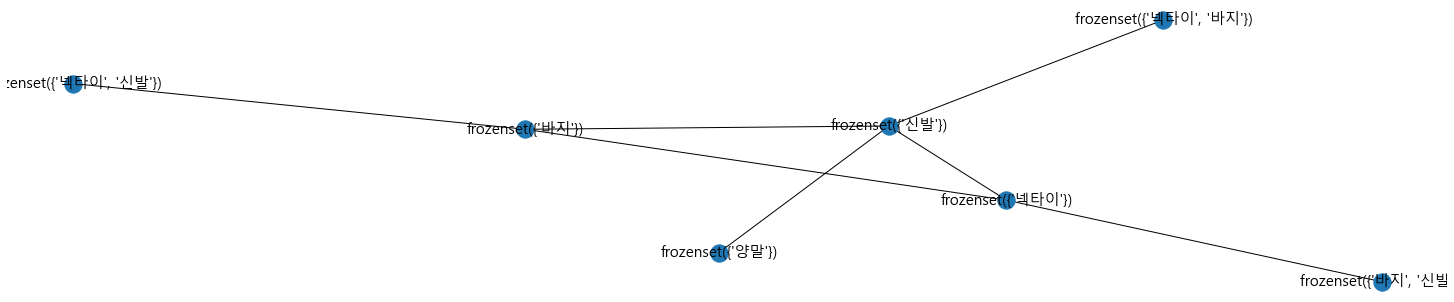

In [5]:
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt

ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)